In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("/Users/Ashwin/Desktop/Machine Learning/Kaggle Datasets/Time series problem/BostonCrimes.csv")


In [3]:
dataset.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192055185,3301,Verbal Disputes,VERBAL DISPUTE,C11,344,NaN,2019-07-17 21:31:00,2019,7,Wednesday,21,Part Three,GENEVA AVE,42.301351,-71.067965,"(42.30135087, -71.06796465)"
1,I192055183,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E5,739,NaN,2019-07-17 21:08:00,2019,7,Wednesday,21,Part Three,DWINELL ST,42.289366,-71.163810,"(42.28936619, -71.16381000)"
2,I192055182,2610,Other,TRESPASSING,NaN,,NaN,2019-07-17 21:32:00,2019,7,Wednesday,21,Part Two,NaN,42.356995,-71.058738,"(42.35699456, -71.05873777)"
3,I192055180,2647,Other,THREATS TO DO BODILY HARM,C11,933,NaN,2019-07-17 21:12:00,2019,7,Wednesday,21,Part Two,WASHINGTON ST,42.284195,-71.071580,"(42.28419540, -71.07157967)"
4,I192055177,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,A1,103,NaN,2019-07-17 20:42:00,2019,7,Wednesday,20,Part Three,BROMFIELD ST,42.356721,-71.060223,"(42.35672129, -71.06022279)"


In [4]:
dataset.OFFENSE_CODE_GROUP.value_counts().iloc[:10]


Motor Vehicle Accident Response    47090
Larceny                            32826
Medical Assistance                 30721
Investigate Person                 23682
Other                              22746
Drug Violation                     20970
Simple Assault                     20191
Vandalism                          19073
Verbal Disputes                    16823
Investigate Property               14328
Name: OFFENSE_CODE_GROUP, dtype: int64

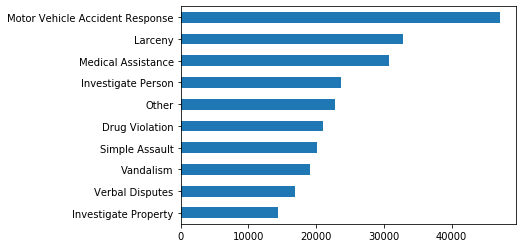

In [5]:
dataset.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values().plot(kind = "barh")

In [8]:
Larceny = dataset[dataset.OFFENSE_CODE_GROUP.str.contains("Larceny")]

In [9]:
Larceny.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
24,I192055156,617,Larceny,LARCENY THEFT FROM BUILDING,B2,616,NaN,2019-07-17 14:00:00,2019,7,Wednesday,14,Part One,PALACE RD,42.338401,-71.099392,"(42.33840144, -71.09939195)"
25,I192055154,619,Larceny,LARCENY ALL OTHERS,B3,406,NaN,2019-07-15 04:00:00,2019,7,Monday,4,Part One,RIVER ST,42.271892,-71.071638,"(42.27189172, -71.07163755)"
26,I192055153,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C11,357,NaN,2019-07-16 19:30:00,2019,7,Tuesday,19,Part One,WESTVILLE ST,42.300630,-71.068880,"(42.30063034, -71.06888016)"
27,I192055152,619,Larceny,LARCENY ALL OTHERS,C6,913,NaN,2019-07-17 18:45:00,2019,7,Wednesday,18,Part One,HARBOR POINT BLVD,42.319278,-71.041423,"(42.31927768, -71.04142331)"
30,I192055147,613,Larceny,LARCENY SHOPLIFTING,NaN,,NaN,2019-07-17 19:17:00,2019,7,Wednesday,19,Part One,NEWBURY,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"


In [11]:
Larceny.shape

(46054, 17)

In [12]:
Larceny.groupby("STREET").size().sort_values(ascending = False)

STREET
BOYLSTON ST       2862
WASHINGTON ST     2801
NEWBURY ST        1207
HUNTINGTON AVE    1164
BLUE HILL AVE      867
                  ... 
DELANO PARK          1
SACKVILLE ST         1
JEFFERS ST           1
DEAN ST              1
LOTHROP ST           1
Length: 2909, dtype: int64

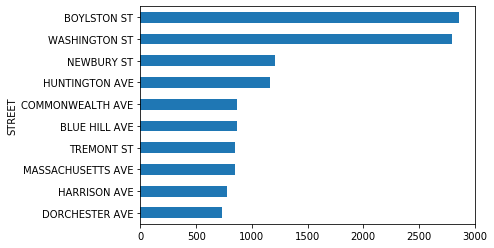

In [14]:
Larceny.groupby("STREET").size().sort_values(ascending = False).head(10).sort_values().plot(kind = "barh")

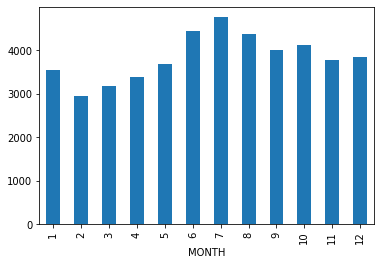

In [15]:
Larceny.groupby("MONTH").size().plot(kind = "bar")

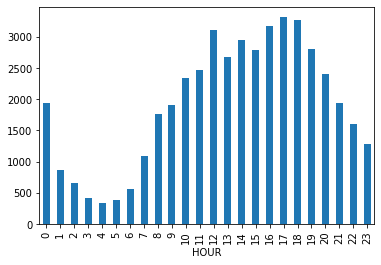

In [16]:
Larceny.groupby("HOUR").size().plot(kind = "bar")

In [18]:
Larceny[Larceny.YEAR == 2019].groupby(["MONTH","HOUR"]).size().unstack(0)

MONTH,1,2,3,4,5,6,7
HOUR,,,,,,,
0,32,25,35,28,44,34,19
1,12,16,18,10,22,20,11
2,17,6,11,20,14,7,8
3,7,5,4,9,7,10,5
4,6,5,5,9,7,8,5
5,13,2,5,10,7,7,6
6,12,7,8,12,10,11,7
7,21,12,14,17,25,21,11
8,29,18,22,30,32,43,15


In [19]:
Larceny[Larceny.YEAR == 2018].groupby(["MONTH","HOUR"]).size().unstack(0)

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR,,,,,,,,,,,,
0,39.0,45.0,37.0,49.0,41.0,50.0,40.0,39.0,41.0,43.0,36.0,40.0
1,17.0,19.0,18.0,14.0,19.0,22.0,20.0,19.0,18.0,15.0,17.0,16.0
2,14.0,11.0,5.0,13.0,15.0,15.0,10.0,15.0,16.0,18.0,13.0,20.0
3,5.0,8.0,6.0,5.0,8.0,14.0,10.0,11.0,11.0,3.0,6.0,5.0
4,6.0,4.0,5.0,4.0,18.0,6.0,4.0,7.0,7.0,7.0,7.0,9.0
5,4.0,7.0,NaN,6.0,7.0,4.0,14.0,9.0,9.0,5.0,8.0,8.0
6,8.0,6.0,14.0,8.0,12.0,12.0,16.0,14.0,14.0,12.0,10.0,10.0
7,27.0,18.0,11.0,18.0,33.0,27.0,29.0,33.0,25.0,27.0,31.0,21.0
8,31.0,24.0,35.0,33.0,38.0,35.0,40.0,44.0,38.0,44.0,40.0,31.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110146240>,
      dtype=object)

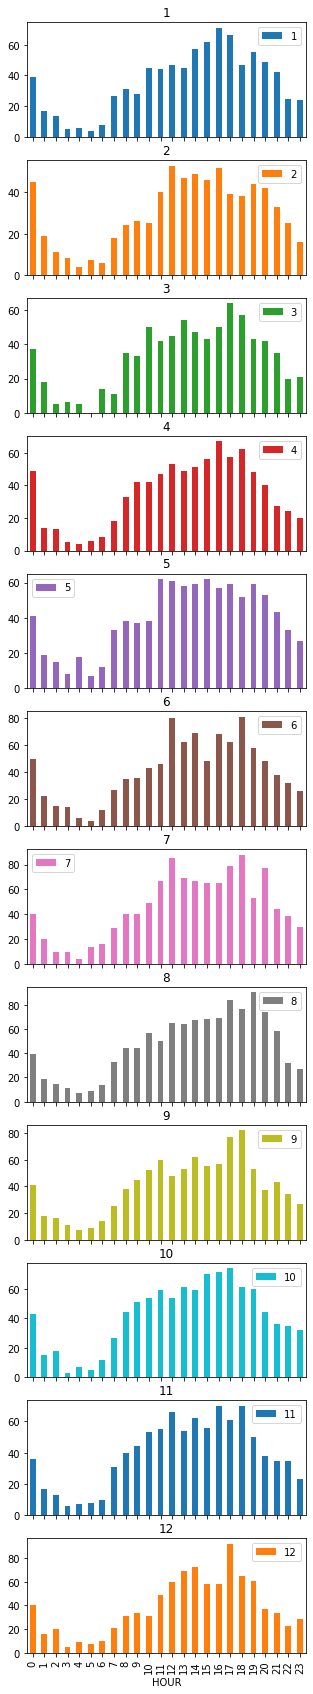

In [21]:
Larceny[Larceny.YEAR == 2018].groupby(["MONTH","HOUR"]).size().unstack(0).plot(subplots = True, kind="bar", figsize = (5,30))